* https://towardsdatascience.com/4x-faster-scikit-learn-in-3-lines-of-code-6b8799876b4a
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
blackhole_data = pd.read_csv('https://www.scidrive.org/vospace-2.0/data/9899fdda-f611-49ef-beb3-d87c881942a6').sort_index(axis=0)

In [4]:
blackhole_data.head(5)

u-band_galaxy_magnitude  g-band_galaxy_magnitude  r-band_galaxy_magnitude  \
0                 -15.6916                 -17.4232                 -18.2607   
1                 -15.2488                 -16.9293                 -17.7598   
2                 -14.8094                 -16.4058                 -17.2139   
3                 -14.4113                 -16.1540                 -17.0289   
4                 -15.8683                 -17.6626                 -18.5348   

   i-band_galaxy_magnitude  z-band_galaxy_magnitude  u-band_bulge_magnitude  \
0                 -18.6473                 -18.9922                -15.5794   
1                 -18.1544                 -18.5009                -15.1665   
2                 -17.6092                 -17.9265                -14.5684   
3                 -17.4467                 -17.8060                 99.6834   
4                 -18.9339                 -19.3054                -15.7981   

   g-band_bulge_magnitude  r-band_bulge_magnitude  i-band_bulge_magnitude  \
0                -17.2906                -18.1089                -18.4813   
1                -16.8167                -17.6140                -17.9796   
2                -16.1043                -16.8548                -17.2060   
3                 99.6834                 99.6834                 99.6834   
4                -17.5667                -18.4124                -18.7898   

   z-band_bulge_magnitude  ...        vx       vy        vz  \
0                -18.8122  ...  1185.440 -435.091  1223.880   
1                -18.2925  ...   885.070  376.283   849.619   
2                -17.4766  ...  -574.724 -574.518  -358.310   
3                 99.6834  ...  1336.570  472.952   911.000   
4                -19.1370  ...  -212.892   47.240   758.618   

   total_stellar_mass  bulge_stellar_mass  cold_gas_mass  hot_gas_mass  \
0            1.219120            0.990821       0.013570           0.0   
1            0.806044            0.585558       0.011597           0.0   
2            0.438918            0.252069       0.013100           0.0   
3            0.416427            0.000000       0.057437           0.0   
4            1.745400            1.370890       0.030991           0.0   

   ejected_gas_mass  black_hole_mass  total_star_formation_rate  
0               0.0         0.000000               0.000000e+00  
1               0.0         0.000012               1.000000e-07  
2               0.0         0.000352               0.000000e+00  
3               0.0         0.000000               3.000000e-07  
4               0.0         0.000000               2.000000e-07  

[5 rows x 23 columns]

In [5]:
blackhole_data.isnull().sum()

u-band_galaxy_magnitude      0
g-band_galaxy_magnitude      0
r-band_galaxy_magnitude      0
i-band_galaxy_magnitude      0
z-band_galaxy_magnitude      0
u-band_bulge_magnitude       0
g-band_bulge_magnitude       0
r-band_bulge_magnitude       0
i-band_bulge_magnitude       0
z-band_bulge_magnitude       0
x                            0
y                            0
z                            0
vx                           0
vy                           0
vz                           0
total_stellar_mass           0
bulge_stellar_mass           0
cold_gas_mass                0
hot_gas_mass                 0
ejected_gas_mass             0
black_hole_mass              0
total_star_formation_rate    0
dtype: int64

In [6]:
blackhole_data.shape

(9473461, 23)

In [7]:
blackhole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473461 entries, 0 to 9473460
Data columns (total 23 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   u-band_galaxy_magnitude    float64
 1   g-band_galaxy_magnitude    float64
 2   r-band_galaxy_magnitude    float64
 3   i-band_galaxy_magnitude    float64
 4   z-band_galaxy_magnitude    float64
 5   u-band_bulge_magnitude     float64
 6   g-band_bulge_magnitude     float64
 7   r-band_bulge_magnitude     float64
 8   i-band_bulge_magnitude     float64
 9   z-band_bulge_magnitude     float64
 10  x                          float64
 11  y                          float64
 12  z                          float64
 13  vx                         float64
 14  vy                         float64
 15  vz                         float64
 16  total_stellar_mass         float64
 17  bulge_stellar_mass         float64
 18  cold_gas_mass              float64
 19  hot_gas_mass               float64
 20  ej

In [8]:
blackhole_data.describe()

u-band_galaxy_magnitude  g-band_galaxy_magnitude  \
count             9.473461e+06             9.473461e+06   
mean             -1.634819e+01            -1.762160e+01   
std               1.214633e+00             1.190317e+00   
min              -2.297370e+01            -2.308130e+01   
25%              -1.717050e+01            -1.843250e+01   
50%              -1.616700e+01            -1.736910e+01   
75%              -1.541390e+01            -1.664570e+01   
max              -1.304660e+01            -1.522590e+01   

       r-band_galaxy_magnitude  i-band_galaxy_magnitude  \
count             9.473461e+06             9.473461e+06   
mean             -1.820151e+01            -1.848423e+01   
std               1.222031e+00             1.245271e+00   
min              -2.299930e+01            -2.336700e+01   
25%              -1.902720e+01            -1.932230e+01   
50%              -1.792570e+01            -1.820380e+01   
75%              -1.718080e+01            -1.744830e+01   
max              -1.660000e+01            -1.630470e+01   

       z-band_galaxy_magnitude  u-band_bulge_magnitude  \
count             9.473461e+06            9.473461e+06   
mean             -1.872921e+01            2.203092e+01   
std               1.281317e+00            5.335315e+01   
min              -2.369830e+01           -2.297370e+01   
25%              -1.959090e+01           -1.527810e+01   
50%              -1.844380e+01           -1.339310e+01   
75%              -1.767030e+01            9.968340e+01   
max              -1.605070e+01            9.968340e+01   

       g-band_bulge_magnitude  r-band_bulge_magnitude  i-band_bulge_magnitude  \
count            9.473461e+06            9.473461e+06            9.473461e+06   
mean             2.099560e+01            2.049790e+01            2.027161e+01   
std              5.406640e+01            5.440910e+01            5.456486e+01   
min             -2.307900e+01           -2.299590e+01           -2.336230e+01   
25%             -1.684270e+01           -1.758570e+01           -1.792460e+01   
50%             -1.485930e+01           -1.556970e+01           -1.589670e+01   
75%              9.968340e+01            9.968340e+01            9.968340e+01   
max              9.968340e+01            9.968340e+01            9.968340e+01   

       z-band_bulge_magnitude  ...            vx            vy            vz  \
count            9.473461e+06  ...  9.473461e+06  9.473461e+06  9.473461e+06   
mean             2.009003e+01  ...  2.446068e-01  1.699969e-01 -2.657710e-01   
std              5.469054e+01  ...  3.645128e+02  3.548591e+02  3.714983e+02   
min             -2.369130e+01  ... -4.311200e+03 -4.495630e+03 -4.511380e+03   
25%             -1.820790e+01  ... -2.118680e+02 -2.024610e+02 -2.218020e+02   
50%             -1.614300e+01  ... -1.086690e+00  2.460130e+00 -3.595980e+00   
75%              9.968340e+01  ...  2.135030e+02  2.030780e+02  2.189860e+02   
max              9.968340e+01  ...  5.168250e+03  5.076010e+03  4.876770e+03   

       total_stellar_mass  bulge_stellar_mass  cold_gas_mass  hot_gas_mass  \
count        9.473461e+06        9.473461e+06   9.473461e+06  9.473461e+06   
mean         1.452132e+00        8.233894e-01   1.646152e-01  2.563419e+00   
std          3.199518e+00        2.758619e+00   2.662809e-01  3.905649e+01   
min          1.417800e-03        0.000000e+00   4.210000e-05  0.000000e+00   
25%          1.720150e-01        0.000000e+00   3.268580e-02  0.000000e+00   
50%          3.887570e-01        5.923490e-02   8.183460e-02  0.000000e+00   
75%          1.204920e+00        4.332040e-01   1.832580e-01  1.992370e-02   
max          8.855310e+01        8.848740e+01   4.853570e+01  1.592190e+04   

       ejected_gas_mass  black_hole_mass  total_star_formation_rate  
count      9.473461e+06     9.473461e+06               9.473461e+06  
mean       3.751009e-01     7.331267e-04               4.673728e-01  
std        4.521135e-01     4.307355e-03               1

In [9]:
dataframe = blackhole_data.drop(columns=['u-band_galaxy_magnitude','g-band_galaxy_magnitude','r-band_galaxy_magnitude','i-band_galaxy_magnitude','z-band_galaxy_magnitude','u-band_bulge_magnitude','g-band_bulge_magnitude','r-band_bulge_magnitude','i-band_bulge_magnitude','z-band_bulge_magnitude','x','y','z','vx','vy','vz'])

In [10]:
dataframe.head(5)

total_stellar_mass  bulge_stellar_mass  cold_gas_mass  hot_gas_mass  \
0            1.219120            0.990821       0.013570           0.0   
1            0.806044            0.585558       0.011597           0.0   
2            0.438918            0.252069       0.013100           0.0   
3            0.416427            0.000000       0.057437           0.0   
4            1.745400            1.370890       0.030991           0.0   

   ejected_gas_mass  black_hole_mass  total_star_formation_rate  
0               0.0         0.000000               0.000000e+00  
1               0.0         0.000012               1.000000e-07  
2               0.0         0.000352               0.000000e+00  
3               0.0         0.000000               3.000000e-07  
4               0.0         0.000000               2.000000e-07

In [11]:
dataframe.corr()

total_stellar_mass  bulge_stellar_mass  \
total_stellar_mass                   1.000000            0.928794   
bulge_stellar_mass                   0.928794            1.000000   
cold_gas_mass                        0.241455            0.038659   
hot_gas_mass                         0.497481            0.540678   
ejected_gas_mass                    -0.111965           -0.161372   
black_hole_mass                      0.752078            0.820145   
total_star_formation_rate            0.235904            0.082241   

                           cold_gas_mass  hot_gas_mass  ejected_gas_mass  \
total_stellar_mass              0.241455      0.497481         -0.111965   
bulge_stellar_mass              0.038659      0.540678         -0.161372   
cold_gas_mass                   1.000000      0.041027          0.338629   
hot_gas_mass                    0.041027      1.000000         -0.046116   
ejected_gas_mass                0.338629     -0.046116          1.000000   
black_hole_mass                 0.032900      0.669272         -0.100879   
total_star_formation_rate       0.597890      0.019914          0.303260   

                           black_hole_mass  total_star_formation_rate  
total_stellar_mass                0.752078                   0.235904  
bulge_stellar_mass                0.820145                   0.082241  
cold_gas_mass                     0.032900                   0.597890  
hot_gas_mass                      0.669272                   0.019914  
ejected_gas_mass                 -0.100879                   0.303260  
black_hole_mass                   1.000000                   0.023338  
total_star_formation_rate         0.023338                   1.000000

In [50]:
dataframe.describe()

total_stellar_mass  bulge_stellar_mass  cold_gas_mass  hot_gas_mass  \
count        9.473461e+06        9.473461e+06   9.473461e+06  9.473461e+06   
mean         1.452132e+00        8.233894e-01   1.646152e-01  2.563419e+00   
std          3.199518e+00        2.758619e+00   2.662809e-01  3.905649e+01   
min          1.417800e-03        0.000000e+00   4.210000e-05  0.000000e+00   
25%          1.720150e-01        0.000000e+00   3.268580e-02  0.000000e+00   
50%          3.887570e-01        5.923490e-02   8.183460e-02  0.000000e+00   
75%          1.204920e+00        4.332040e-01   1.832580e-01  1.992370e-02   
max          8.855310e+01        8.848740e+01   4.853570e+01  1.592190e+04   

       ejected_gas_mass  black_hole_mass  total_star_formation_rate  
count      9.473461e+06     9.473461e+06               9.473461e+06  
mean       3.751009e-01     7.331267e-04               4.673728e-01  
std        4.521135e-01     4.307355e-03               1.340774e+00  
min        0.000000e+00     0.000000e+00               0.000000e+00  
25%        0.000000e+00     0.000000e+00               0.000000e+00  
50%        2.367600e-01     3.320000e-05               7.883870e-02  
75%        6.336860e-01     2.233000e-04               3.539030e-01  
max        6.346810e+00     5.265160e-01               1.333030e+02

In [12]:
X = dataframe.drop(['black_hole_mass'],axis=1)

In [13]:
y = dataframe[['black_hole_mass']]

In [14]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
standard = StandardScaler()
X_stnd = standard.fit_transform(X)

In [16]:
X_scale = pd.DataFrame(X_stnd,columns=X.columns)

In [17]:
X_scale.describe()

total_stellar_mass  bulge_stellar_mass  cold_gas_mass  hot_gas_mass  \
count        9.473461e+06        9.473461e+06   9.473461e+06  9.473461e+06   
mean        -7.013517e-16       -9.515131e-14  -6.062863e-16 -4.644090e-14   
std          1.000000e+00        1.000000e+00   1.000000e+00  1.000000e+00   
min         -4.534166e-01       -2.984789e-01  -6.180431e-01 -6.563362e-02   
25%         -4.000969e-01       -2.984789e-01  -4.954519e-01 -6.563362e-02   
50%         -3.323548e-01       -2.770062e-01  -3.108769e-01 -6.563362e-02   
75%         -7.726548e-02       -1.414423e-01   7.001182e-02 -6.512350e-02   
max          2.722315e+01        3.177823e+01   1.816543e+02  4.075978e+02   

       ejected_gas_mass  total_star_formation_rate  
count      9.473461e+06               9.473461e+06  
mean      -3.222697e-13              -2.047328e-14  
std        1.000000e+00               1.000000e+00  
min       -8.296609e-01              -3.485844e-01  
25%       -8.296609e-01              -3.485844e-01  
50%       -3.059871e-01              -2.897835e-01  
75%        5.719474e-01              -8.463010e-02  
max        1.320843e+01               9.907384e+01

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
PrincipalComponents = pca.fit_transform(X_scale)
PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=['pc-1: total_stellar_mass','pc-2: bulge_stellar_mass','pc-3: cold_gas_mass','pc-4: hot_gas_mass','pc-5: ejected_gas_mass','pc-6: total_star_formation_rate'])
PrincipalDf.head(5)

pc-1: total_stellar_mass  pc-2: bulge_stellar_mass  pc-3: cold_gas_mass  \
0                 -0.216190                 -0.948585            -0.413233   
1                 -0.381651                 -0.912749            -0.392637   
2                 -0.520410                 -0.875783            -0.377146   
3                 -0.541605                 -0.758998            -0.411057   
4                 -0.021944                 -0.951247            -0.450889   

   pc-4: hot_gas_mass  pc-5: ejected_gas_mass  pc-6: total_star_formation_rate  
0            0.105346               -0.125460                         0.027437  
1            0.199541               -0.139970                         0.015773  
2            0.282771               -0.144518                         0.013803  
3            0.361104               -0.028308                        -0.021453  
4            0.017831               -0.067423                         0.015845

In [19]:
finalDf = pd.concat([PrincipalDf,dataframe[['black_hole_mass']]],axis=1)
finalDf.head()

pc-1: total_stellar_mass  pc-2: bulge_stellar_mass  pc-3: cold_gas_mass  \
0                 -0.216190                 -0.948585            -0.413233   
1                 -0.381651                 -0.912749            -0.392637   
2                 -0.520410                 -0.875783            -0.377146   
3                 -0.541605                 -0.758998            -0.411057   
4                 -0.021944                 -0.951247            -0.450889   

   pc-4: hot_gas_mass  pc-5: ejected_gas_mass  \
0            0.105346               -0.125460   
1            0.199541               -0.139970   
2            0.282771               -0.144518   
3            0.361104               -0.028308   
4            0.017831               -0.067423   

   pc-6: total_star_formation_rate  black_hole_mass  
0                         0.027437         0.000000  
1                         0.015773         0.000012  
2                         0.013803         0.000352  
3                        -0.021453         0.000000  
4                         0.015845         0.000000

In [20]:
pca.explained_variance_ratio_

array([0.40528486, 0.30357021, 0.12715948, 0.08933874, 0.06681963,
       0.00782708])

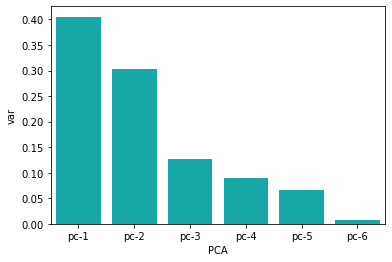

In [21]:
import seaborn as sns
dfexp = pd.DataFrame({'var':pca.explained_variance_ratio_,'PCA':['pc-1','pc-2','pc-3','pc-4','pc-5','pc-6']})
sns.barplot(x='PCA',y='var',data=dfexp,color="c");

In [22]:
minmax = MinMaxScaler()
X_min = minmax.fit_transform(X)

In [23]:
X_scale = pd.DataFrame(X_min,columns=X.columns)

In [24]:
X_scale.describe()

total_stellar_mass  bulge_stellar_mass  cold_gas_mass  hot_gas_mass  \
count        9.473461e+06        9.473461e+06   9.473461e+06  9.473461e+06   
mean         1.638269e-02        9.305159e-03   3.390767e-03  1.609996e-04   
std          3.613165e-02        3.117527e-02   5.486295e-03  2.453004e-03   
min          0.000000e+00        0.000000e+00   0.000000e+00  0.000000e+00   
25%          1.926527e-03        0.000000e+00   6.725715e-04  0.000000e+00   
50%          4.374160e-03        6.694162e-04   1.685204e-03  0.000000e+00   
75%          1.359096e-02        4.895657e-03   3.774872e-03  1.251339e-06   
max          1.000000e+00        1.000000e+00   1.000000e+00  1.000000e+00   

       ejected_gas_mass  total_star_formation_rate  
count      9.473461e+06               9.473461e+06  
mean       5.910069e-02               3.506094e-03  
std        7.123476e-02               1.005809e-02  
min        0.000000e+00               0.000000e+00  
25%        0.000000e+00               0.000000e+00  
50%        3.730378e-02               5.914248e-04  
75%        9.984323e-02               2.654876e-03  
max        1.000000e+00               1.000000e+00

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
PrincipalComponents = pca.fit_transform(X_scale)
PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=['pc-1: total_stellar_mass','pc-2: bulge_stellar_mass','pc-3: cold_gas_mass','pc-4: hot_gas_mass','pc-5: ejected_gas_mass','pc-6: total_star_formation_rate'])
PrincipalDf.head(5)

pc-1: total_stellar_mass  pc-2: bulge_stellar_mass  pc-3: cold_gas_mass  \
0                 -0.058517                 -0.009724            -0.002177   
1                 -0.057536                 -0.016157            -0.001609   
2                 -0.056695                 -0.021681            -0.001235   
3                 -0.056333                 -0.023655             0.000403   
4                 -0.059590                 -0.002496            -0.002024   

   pc-4: hot_gas_mass  pc-5: ejected_gas_mass  pc-6: total_star_formation_rate  
0            0.001179               -0.000691                        -0.000140  
1            0.001033               -0.000750                         0.000063  
2            0.001064               -0.000687                         0.000225  
3           -0.000393               -0.000274                         0.000334  
4            0.000516               -0.000591                        -0.000330

In [26]:
finalDf = pd.concat([PrincipalDf,dataframe[['black_hole_mass']]],axis=1)
finalDf.head()

pc-1: total_stellar_mass  pc-2: bulge_stellar_mass  pc-3: cold_gas_mass  \
0                 -0.058517                 -0.009724            -0.002177   
1                 -0.057536                 -0.016157            -0.001609   
2                 -0.056695                 -0.021681            -0.001235   
3                 -0.056333                 -0.023655             0.000403   
4                 -0.059590                 -0.002496            -0.002024   

   pc-4: hot_gas_mass  pc-5: ejected_gas_mass  \
0            0.001179               -0.000691   
1            0.001033               -0.000750   
2            0.001064               -0.000687   
3           -0.000393               -0.000274   
4            0.000516               -0.000591   

   pc-6: total_star_formation_rate  black_hole_mass  
0                        -0.000140         0.000000  
1                         0.000063         0.000012  
2                         0.000225         0.000352  
3                         0.000334         0.000000  
4                        -0.000330         0.000000

In [27]:
pca.explained_variance_ratio_

array([6.88529388e-01, 2.85571119e-01, 1.68111913e-02, 6.69429622e-03,
       1.83122643e-03, 5.62778427e-04])

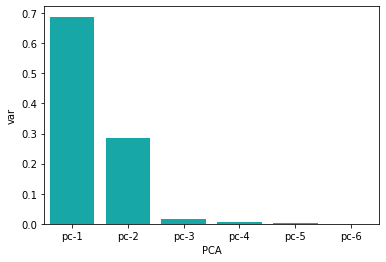

In [28]:
import seaborn as sns
dfexp = pd.DataFrame({'var':pca.explained_variance_ratio_,'PCA':['pc-1','pc-2','pc-3','pc-4','pc-5','pc-6']})
sns.barplot(x='PCA',y='var',data=dfexp,color="c");

In [29]:
rb = RobustScaler()
X_rb = rb.fit_transform(X)

In [30]:
X_scale = pd.DataFrame(X_rb,columns=X.columns)

In [31]:
X_scale.describe()

total_stellar_mass  bulge_stellar_mass  cold_gas_mass  hot_gas_mass  \
count        9.473461e+06        9.473461e+06   9.473461e+06  9.473461e+06   
mean         1.029500e+00        1.763960e+00   5.497734e-01  1.286618e+02   
std          3.097592e+00        6.367944e+00   1.768460e+00  1.960303e+03   
min         -3.749998e-01       -1.367367e-01  -5.432112e-01  0.000000e+00   
25%         -2.098373e-01       -1.367367e-01  -3.264135e-01  0.000000e+00   
50%          0.000000e+00        0.000000e+00   0.000000e+00  0.000000e+00   
75%          7.901627e-01        8.632633e-01   6.735865e-01  1.000000e+00   
max          8.535571e+01        2.041259e+02   3.217982e+02  7.991437e+05   

       ejected_gas_mass  total_star_formation_rate  
count      9.473461e+06               9.473461e+06  
mean       2.183114e-01               1.097855e+00  
std        7.134661e-01               3.788535e+00  
min       -3.736235e-01              -2.227692e-01  
25%       -3.736235e-01              -2.227692e-01  
50%        0.000000e+00               0.000000e+00  
75%        6.263765e-01               7.772308e-01  
max        9.642078e+00               3.764426e+02

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
PrincipalComponents = pca.fit_transform(X_scale)
PrincipalDf = pd.DataFrame(data=PrincipalComponents,columns=['pc-1: total_stellar_mass','pc-2: bulge_stellar_mass','pc-3: cold_gas_mass','pc-4: hot_gas_mass','pc-5: ejected_gas_mass','pc-6: total_star_formation_rate'])
PrincipalDf.head(5)

pc-1: total_stellar_mass  pc-2: bulge_stellar_mass  pc-3: cold_gas_mass  \
0               -128.661125                 -0.286545            -1.686341   
1               -128.663082                  0.720221            -1.544739   
2               -128.664713                  1.559198            -1.423398   
3               -128.665742                  2.076536            -1.229966   
4               -128.659179                 -1.292335            -1.779861   

   pc-4: hot_gas_mass  pc-5: ejected_gas_mass  pc-6: total_star_formation_rate  
0           -0.596765               -0.173166                         0.399176  
1           -0.606436               -0.210431                         0.411533  
2           -0.604781               -0.213078                         0.432387  
3           -0.274535               -0.320092                         0.445756  
4           -0.454508               -0.212707                         0.375554

In [33]:
finalDf = pd.concat([PrincipalDf,dataframe[['black_hole_mass']]],axis=1)
finalDf.head()

pc-1: total_stellar_mass  pc-2: bulge_stellar_mass  pc-3: cold_gas_mass  \
0               -128.661125                 -0.286545            -1.686341   
1               -128.663082                  0.720221            -1.544739   
2               -128.664713                  1.559198            -1.423398   
3               -128.665742                  2.076536            -1.229966   
4               -128.659179                 -1.292335            -1.779861   

   pc-4: hot_gas_mass  pc-5: ejected_gas_mass  \
0           -0.596765               -0.173166   
1           -0.606436               -0.210431   
2           -0.604781               -0.213078   
3           -0.274535               -0.320092   
4           -0.454508               -0.212707   

   pc-6: total_star_formation_rate  black_hole_mass  
0                         0.399176         0.000000  
1                         0.411533         0.000012  
2                         0.432387         0.000352  
3                         0.445756         0.000000  
4                         0.375554         0.000000

In [34]:
pca.explained_variance_ratio_

array([9.99985975e-01, 9.16856005e-06, 4.04554302e-06, 5.27483859e-07,
       1.80419725e-07, 1.02495087e-07])

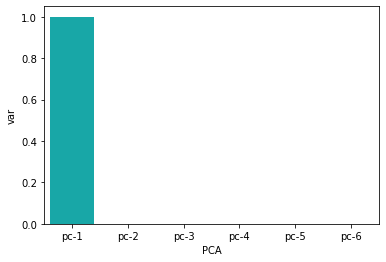

In [35]:
import seaborn as sns
dfexp = pd.DataFrame({'var':pca.explained_variance_ratio_,'PCA':['pc-1','pc-2','pc-3','pc-4','pc-5','pc-6']})
sns.barplot(x='PCA',y='var',data=dfexp,color="c");